In [1]:
file_path = "../data/"

# load embeddings

import pickle

with open(file_path+"embeddings.pkl", "rb") as f:

    embeds = pickle.load(f)



/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

data = pd.read_csv(file_path+"train.csv")

In [3]:
n=len(data)
colors = data['news_category'][:n]
c_map = {
    'ஆன்மீகம்': '#FFA07A',
    'இந்தியா': '#00FFFF',
    'உலகம்': '#FFC0CB',
    'கல்வி': '#ADFF2F',
    'குற்றம்': '#FF1493',
    'சினிமா(ரீல்மா)': '#FF69B4',
    'தமிழகம்': '#FFFF00',
    'தலையங்கம்': '#9370DB',
    'தொழில்': '#00FA9A',
    'மருத்துவம்': '#FFD700',
    'மர்மம்': '#6A5ACD',
    'மாவட்ட மசாலா': '#F0E68C',
    'விளையாட்டு': '#1E90FF',
    'வேலைவாய்ப்பு': '#8FBC8F',
    'ஸ்டேட் எக்ஸ்பிரஸ்': '#FF4500'
}

colors = [c_map[x] for x in colors]



  0%|          | 0/9 [00:00<?, ?it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
100%|██████████| 9/9 [06:26<00:00, 42.94s/it] 


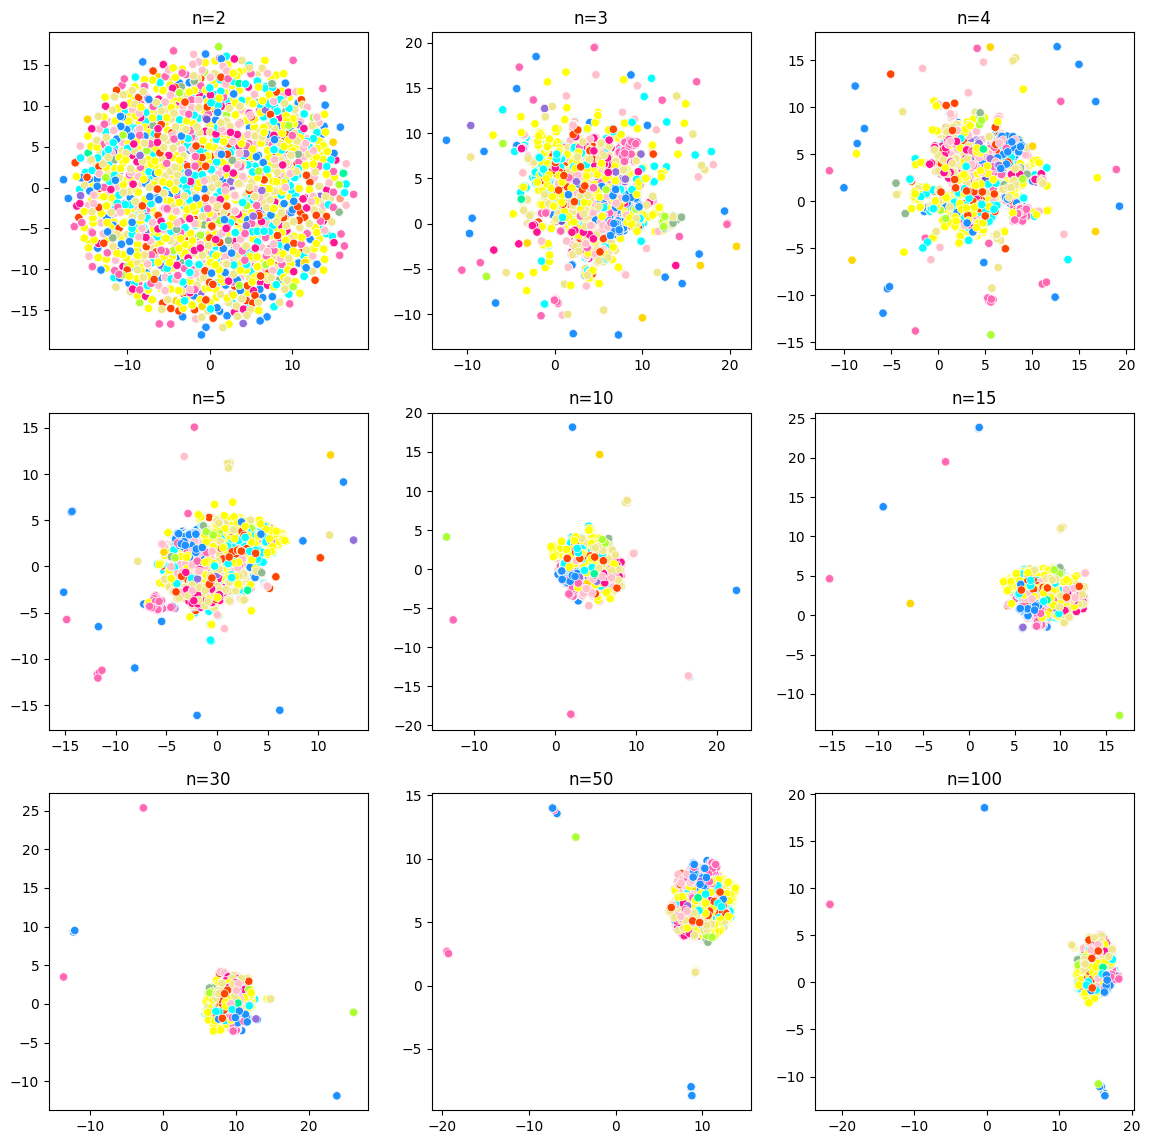

In [4]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(embeds.detach().numpy())
    sns.scatterplot(x=u[:,0], y=u[:,1], c=colors, ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

In [12]:
palette = list(c_map.values())

palette

['#FFA07A',
 '#00FFFF',
 '#FFC0CB',
 '#ADFF2F',
 '#FF1493',
 '#FF69B4',
 '#FFFF00',
 '#9370DB',
 '#00FA9A',
 '#FFD700',
 '#6A5ACD',
 '#F0E68C',
 '#1E90FF',
 '#8FBC8F',
 '#FF4500']

In [81]:
import plotly.express as px


fit = umap.UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
u = fit.fit_transform(embeds.detach().numpy())

fig = px.scatter_3d(
    x=u[:,0], y=u[:,1], z=u[:,2],
    color=data['news_category'][:n],
    custom_data=[data['news_category'][:n], data['news_title'][:n]],
    color_discrete_sequence=palette
)
fig.update_traces(
    hovertemplate="<br>".join([
        "category: %{customdata[0]}",
        "title: %{customdata[1]}"
    ])
)

/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning:

failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!



In [82]:
fig.write_html("umap-topics-3d-color.html", include_plotlyjs="cdn", full_html=False)

In [48]:
import hdbscan

clusterer = hdbscan.HDBSCAN()
clusterer.fit(u)

HDBSCAN()

<Axes: ylabel='$\\lambda$ value'>

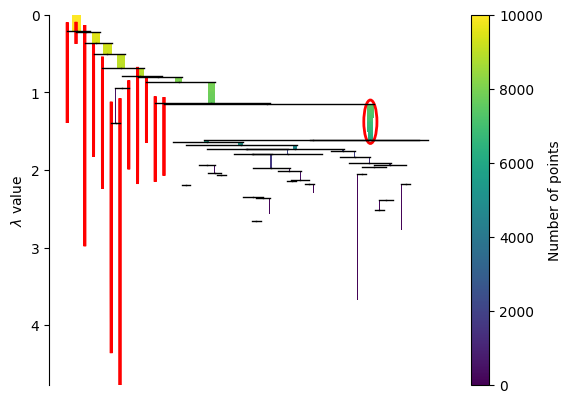

In [77]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=30)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

In [78]:
colors = [str(x) for x in clusterer.labels_]

fig = px.scatter_3d(
    x=u[:,0], y=u[:,1], z=u[:,2],
    color=colors,
    custom_data=[data['news_category'][:n], data['news_title'][:n]],
    color_discrete_sequence=palette
)
fig.update_traces(
    hovertemplate="<br>".join([
        "category: %{customdata[0]}",
        "title: %{customdata[1]}"
    ])
)


In [79]:
fig.write_html("hdbscan-topics-3d.html", include_plotlyjs="cdn", full_html=False)
